In [5]:
import numpy as np
import random

import jieba
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
"""
    产生数据
"""


def read_file(file_name):
    with open(file_name, 'r') as f:
        lines = [line for line in f]
        rownames = []
        data = []
        for line in lines:
            p = line.strip().split('\t')

            rownames.append(int(p[7]) - 1)
            #剩余部分就是该行对应的数据
            data.append([float(x) for x in p[:6]])
    return np.array(data), rownames


"""
    数据作图
"""


def plot_data(*data):
    X, labels_true = data
    labels = np.unique(labels_true)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = 'rgbycm'
    for i, label in enumerate(labels):
        position = labels_true == label
        ax.scatter(X[position, 0], X[position, 1], label="cluster %d" % label),
        color = colors[i % len(colors)]

    ax.legend(loc="best", framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()


"""
    测试函数
"""


def test_AgglomerativeClustering(*data):
    X, labels_true = data
    clst = cluster.AgglomerativeClustering(n_clusters=3)
    predicted_labels = clst.fit_predict(X)
    print("ARI:%s" % adjusted_rand_score(labels_true, predicted_labels))
    return (predicted_labels)


"""
    考察簇的数量对于聚类效果的影响
"""


def test_AgglomerativeClustering_nclusters(*data):
    X, labels_true = data
    nums = range(1, 50)
    ARIS = []
    for num in nums:
        clst = cluster.AgglomerativeClustering(n_clusters=num)
        predicted_lables = clst.fit_predict(X)
        ARIS.append(adjusted_rand_score(labels_true, predicted_lables))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(nums, ARIS, marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    fig.suptitle("AgglomerativeClustering")
    plt.show()


"""
    考察链接方式对聚类结果的影响
"""


def test_agglomerativeClustering_linkage(*data):
    X, labels_true = data
    nums = range(1, 50)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    linkages = ['ward', 'complete', 'average']
    markers = "+o*"
    for i, linkage in enumerate(linkages):
        ARIs = []
        for num in nums:
            clst = cluster.AgglomerativeClustering(n_clusters=num,
                                                   linkage=linkage)
            predicted_labels = clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label="linkage:%s" % linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()

ARI:0.5822755182524181
Silhouette Coefficient:0.42998337136661613


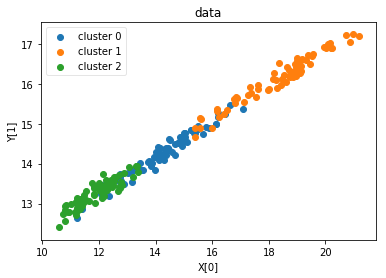

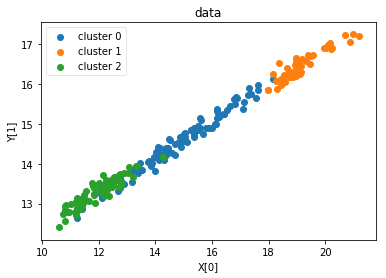

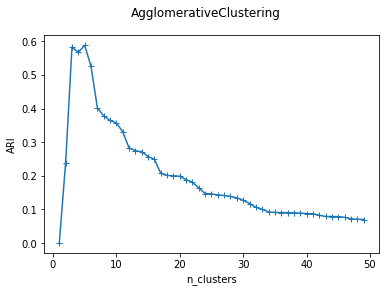

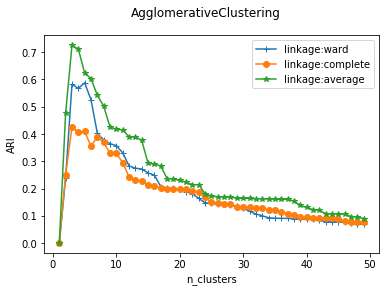

In [6]:
X,labels_true=read_file('./data_set/seeds_dataset.txt')

labels_predict = test_AgglomerativeClustering(X,labels_true)
score = silhouette_score(X, labels_predict, metric='cosine')
print("Silhouette Coefficient:{}".format(score))

plot_data(X,labels_true)
plot_data(X,labels_predict)
test_AgglomerativeClustering_nclusters(X,labels_true)
test_agglomerativeClustering_linkage(X,labels_true)

In [4]:
import PIL.Image as image;
import numpy as np;
from sklearn.cluster import KMeans;

def loadData(filepath):
    f = open(filepath, "rb")
    data = []
    img = image.open(f)
    m, n = img.size
    for i in range(m):
        for j in range(n):
            x, y, z = img.getpixel((i, j))
            data.append([x / 256.0, y / 256.0, z / 256.0])
            f.close()
    return np.mat(data), m, n


imgData, row, col = loadData("./data_set/123.jpg")
label = KMeans(n_clusters=2).fit_predict(imgData)
label = label.reshape([row, col])
pic_new = image.new("L", (row, col))
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i, j), int(256 / (label[i][j] + 1)))
pic_new.save("./data_set/result.jpg", "JPEG")

print("-----------------finished---------------");

-----------------finished---------------
